# Basics


## Overview

- Build a first hypergraph and inspect nodes, edges, and metadata.
- Compute a few core measures to get comfortable with the API.


## Setup


In [1]:
import matplotlib as mpl

mpl.rcParams.update({
    "figure.figsize": (6, 4),
    "figure.dpi": 120,
    "savefig.dpi": 150,
})


In [2]:
import sys
sys.path.append("..")

from hypergraphx.generation.scale_free import scale_free_hypergraph
from hypergraphx.linalg import *
from hypergraphx.representations.projections import bipartite_projection, clique_projection
from hypergraphx.generation.random import *
from hypergraphx.readwrite.save import save_hypergraph
from hypergraphx.readwrite.load import load_hypergraph
from hypergraphx.viz.draw_hypergraph import draw_hypergraph

In [3]:
H = Hypergraph([(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)])
print(H)

Hypergraph with 8 nodes and 5 edges.
Distribution of hyperedge sizes: {2: 3, 4: 1, 3: 1}


In [4]:
H = Hypergraph([(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)], weighted=True, weights=[1, 2, 3, 4, 5])

In [5]:
H.get_edges()

[(1, 3), (1, 4), (1, 2), (5, 6, 7, 8), (1, 2, 3)]

In [6]:
H.get_weights()

[1, 2, 3, 4, 5]

In [7]:
for edge in H:
    print(edge)

((1, 3), 0)
((1, 4), 1)
((1, 2), 2)
((5, 6, 7, 8), 3)
((1, 2, 3), 4)


In [8]:
H.get_weight((1, 2, 3))

5

In [9]:
H.get_weight((2, 3, 1))

5

In [10]:
H.is_connected()

False

<Axes: >

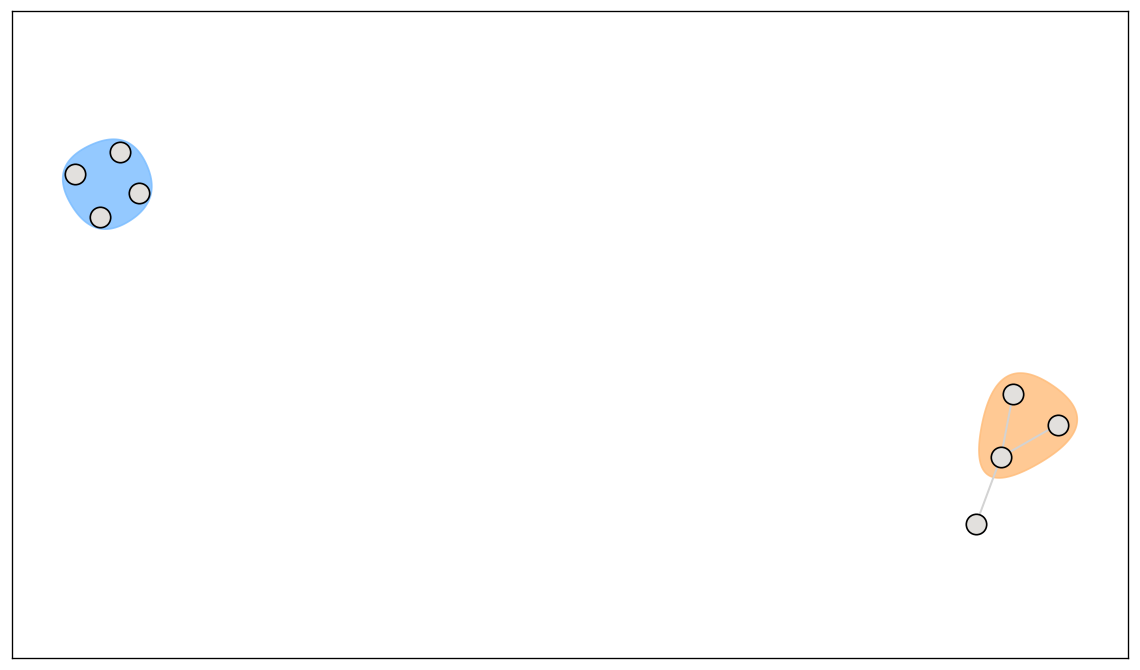

In [11]:
draw_hypergraph(H)

In [12]:
H.add_edge((1,5), weight=10)

<Axes: >

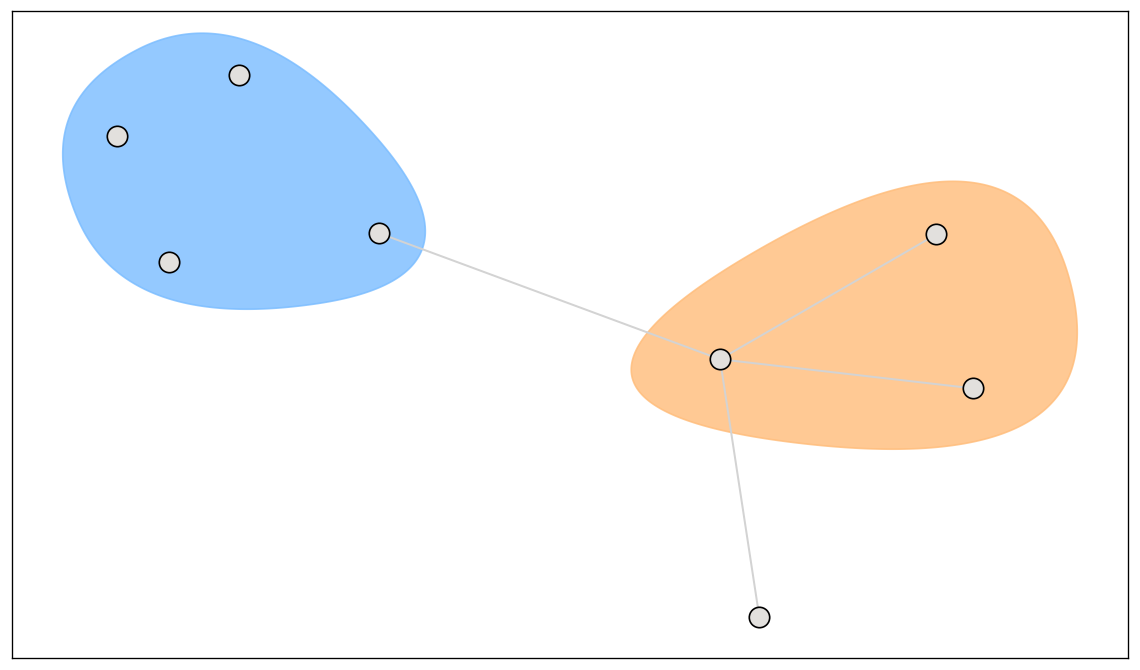

In [13]:
draw_hypergraph(H)

In [14]:
H.is_connected()

True

In [15]:
H.is_uniform()

False

In [16]:
print(H.check_edge((5, 6, 7, 8)))
H.remove_edge((5, 6, 7, 8))

True


In [17]:
print(H.get_edges())
print(H.get_weights())
H.remove_edges([(1,2,3), (1,3)])

[(1, 3), (1, 4), (1, 2), (1, 2, 3), (1, 5)]
[1, 2, 3, 5, 10]


In [18]:
print(H.get_edges())
print(H.is_uniform())

[(1, 4), (1, 2), (1, 5)]
True


In [19]:
H.get_edges()

[(1, 4), (1, 2), (1, 5)]

In [20]:
H.add_attr_to_node_metadata(1, 'role', 'student')

AttributeError: 'Hypergraph' object has no attribute 'add_attr_to_node_metadata'

In [ ]:
H.get_nodes(metadata=True)

{1: {'role': 'student'}, 3: {}, 4: {}, 2: {}, 5: {}, 6: {}, 7: {}, 8: {}}

In [ ]:
H.remove_node(1)

In [ ]:
H.get_nodes(metadata=True)

{3: {}, 4: {}, 2: {}, 5: {}, 6: {}, 7: {}, 8: {}}